In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
houses =  pd.read_csv('AmesHousing.txt', delimiter='\t')

In [5]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
train = houses.iloc[:1460]
test = houses.iloc[1460:]

In [11]:
target = 'SalePrice'

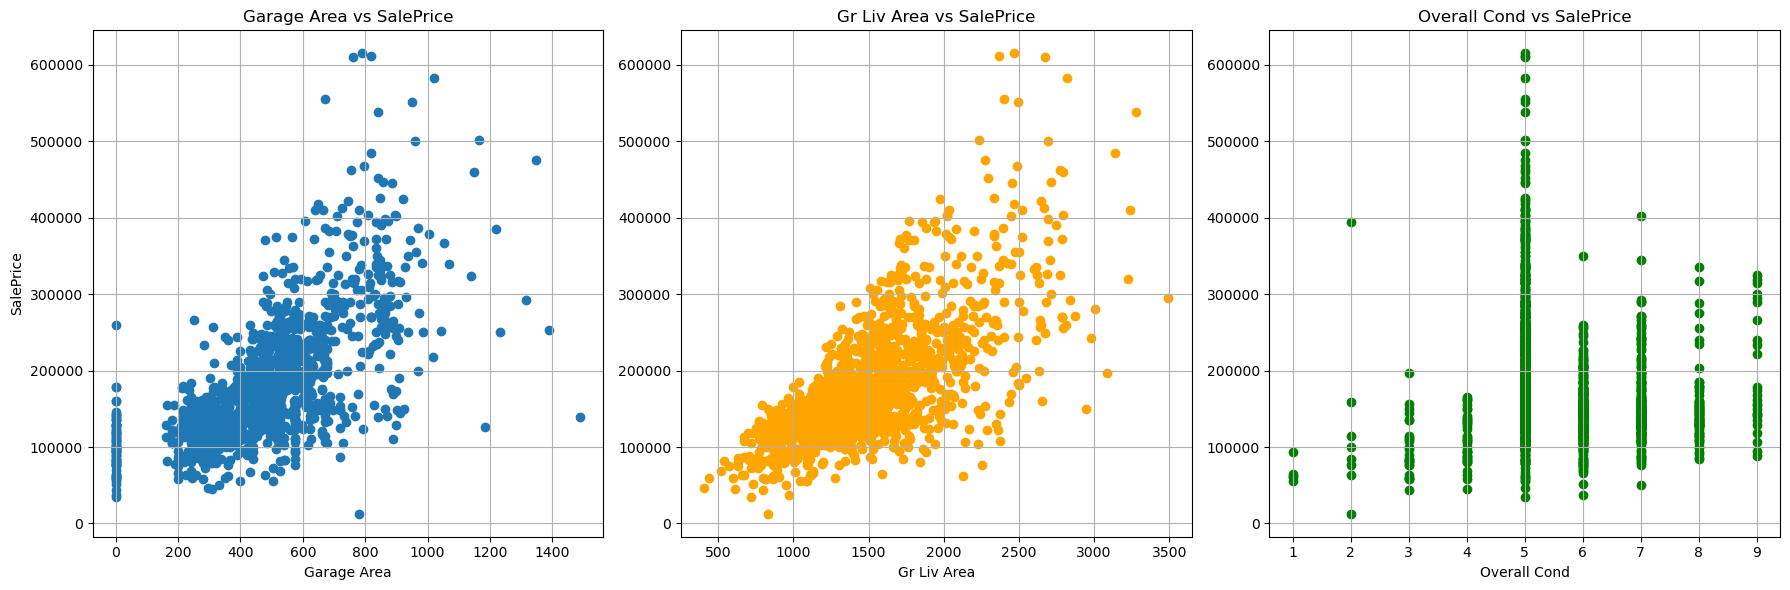

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Garage Area
axs[0].scatter(train['Garage Area'], train[target])
axs[0].set_title('Garage Area vs ' + target)
axs[0].set_xlabel('Garage Area')
axs[0].set_ylabel(target)
axs[0].grid(True)

# Scatter plot for Gr Liv Area
axs[1].scatter(train['Gr Liv Area'], train[target], color='orange')
axs[1].set_title('Gr Liv Area vs ' + target)
axs[1].set_xlabel('Gr Liv Area')
# axs[1].set_ylabel(target)  # Optional, as y-axis is shared across subplots
axs[1].grid(True)

# Scatter plot for Overall Cond
axs[2].scatter(train['Overall Cond'], train[target], color='green')
axs[2].set_title('Overall Cond vs ' + target)
axs[2].set_xlabel('Overall Cond')
# axs[2].set_ylabel(target)  # Optional, as y-axis is shared across subplots
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [25]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', target]].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


In [31]:
lr = LinearRegression()

In [81]:
lr.fit(train[['Gr Liv Area']], train[[target]])
a0 = lr.intercept_[0]
a1 = lr.coef_[0][0]
print(a1, a0)

116.86624682710493 5366.821710056043


In [83]:
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

In [85]:
train_mse = mean_squared_error(train['SalePrice'], train_predictions)
test_mse = mean_squared_error(test['SalePrice'], test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [87]:
print(train_rmse, test_rmse)

56034.362001412796 57088.25161263909


In [59]:
multiple_parameters = ['Overall Cond', 'Gr Liv Area']

In [61]:
lr2 = LinearRegression()

In [89]:
lr2.fit(train[multiple_parameters], train[[target]])
train_predictions = lr2.predict(train[multiple_parameters])
test_predictions = lr2.predict(test[multiple_parameters])

In [91]:
train_mse = mean_squared_error(train['SalePrice'], train_predictions)
test_mse = mean_squared_error(test['SalePrice'], test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [93]:
print(train_rmse, test_rmse)

56032.398015258674 57066.90779448559
